In [76]:
import pandas as pd

In [77]:
df_noway_kr = pd.read_parquet(r"C:\Users\AaronWork\Projects\LoLTracker\apps\data\NowayEUW.parquet")

In [78]:
pd.set_option('display.max_columns', None)
df_noway_kr

,matchId,gameCreation,gameDuration,gameVersion,kills,deaths,assists,championName,firstBloodAssist,firstBloodKill,firstTowerAssist,firstTowerKill,gameEndedInEarlySurrender,gameEndedInSurrender,goldEarned,magicDamageDealtToChampions,physicalDamageDealtToChampions,teamEarlySurrendered,teamPosition,timePlayed,totalDamageDealtToChampions,wardsKilled,wardsPlaced,win
0,EUW1_6640218914,1697821100983,1923,13.20.536.9576,3,11,8,Corki,False,False,False,False,False,True,12984,23068,2947,False,MIDDLE,1923,26778,0,13,False
1,EUW1_6640153056,1697818805612,1924,13.20.536.9576,6,7,13,Xerath,False,True,False,False,False,True,13583,33746,602,False,MIDDLE,1924,34348,0,13,True
2,EUW1_6640098301,1697816794486,1596,13.20.536.9576,5,6,6,Anivia,False,False,False,False,False,False,10678,16956,564,False,MIDDLE,1596,18457,6,8,False
3,EUW1_6640057034,1697815015812,1351,13.20.536.9576,3,5,4,Orianna,False,False,False,False,False,True,9066,19055,986,False,MIDDLE,1351,20042,1,8,False
4,EUW1_6640013568,1697812959841,1560,13.20.536.9576,2,6,3,Gangplank,False,False,False,False,False,False,11835,1247,14630,False,MIDDLE,1560,19505,0,10,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
295,EUW1_6493966215,1689109958054,1395,13.13.518.539,6,10,3,Corki,False,False,False,False,False,True,10924,18798,2266,False,MIDDLE,1395,21967,1,9,False
296,EUW1_6493891554,1689107225771,2316,13.13.518.539,9,12,16,Rumble,False,False,False,False,False,False,16687,33648,960,False,TOP,2316,35747,1,16,False
297,EUW1_6493792276,1689104562955,1989,13.13.518.539,4,6,4,Ahri,False,False,False,True,False,False,13762,17872,1432,False,MIDDLE,1989,25063,2,9,False
298,EUW1_6493719748,1689102169245,1673,13.13.518.539,12,8,14,Ahri,False,False,False,False,False,False,15135,22131,1574,False,MIDDLE,1673,30821,1,8,True


#### Clean data

* convert unix timestamp in milliseconds to datetime

In [79]:
import datetime

# def convert_unix_to_datetime(timestamp_ms):
#     # Convert milliseconds to seconds
#     timestamp_sec = timestamp_ms / 1000.0
    
#     # Create a datetime object
#     datetime_obj = datetime.datetime.utcfromtimestamp(timestamp_sec).replace(microsecond=0)
    
#     return datetime_obj

def convert_unix_to_datetime(timestamp_ms: int):
    timestamp_sec = timestamp_ms / 1000.0
    return datetime.datetime(1970, 1, 1, tzinfo=datetime.timezone.utc) + datetime.timedelta(seconds=timestamp_sec)

In [80]:
# Convert TimestampColumn to datetime and round down to the nearest second
df_noway_kr["testTime"] = df_noway_kr["gameCreation"]
df_noway_kr["gameCreation"] = pd.to_datetime(df_noway_kr[["gameCreation", "testTime"]], unit='ms').dt.floor('s')
df_noway_kr

,matchId,gameCreation,gameDuration,gameVersion,kills,deaths,assists,championName,firstBloodAssist,firstBloodKill,firstTowerAssist,firstTowerKill,gameEndedInEarlySurrender,gameEndedInSurrender,goldEarned,magicDamageDealtToChampions,physicalDamageDealtToChampions,teamEarlySurrendered,teamPosition,timePlayed,totalDamageDealtToChampions,wardsKilled,wardsPlaced,win,testTime
0,EUW1_6640218914,1697821100983,1923,13.20.536.9576,3,11,8,Corki,False,False,False,False,False,True,12984,23068,2947,False,MIDDLE,1923,26778,0,13,False,1697821100983
1,EUW1_6640153056,1697818805612,1924,13.20.536.9576,6,7,13,Xerath,False,True,False,False,False,True,13583,33746,602,False,MIDDLE,1924,34348,0,13,True,1697818805612
2,EUW1_6640098301,1697816794486,1596,13.20.536.9576,5,6,6,Anivia,False,False,False,False,False,False,10678,16956,564,False,MIDDLE,1596,18457,6,8,False,1697816794486
3,EUW1_6640057034,1697815015812,1351,13.20.536.9576,3,5,4,Orianna,False,False,False,False,False,True,9066,19055,986,False,MIDDLE,1351,20042,1,8,False,1697815015812
4,EUW1_6640013568,1697812959841,1560,13.20.536.9576,2,6,3,Gangplank,False,False,False,False,False,False,11835,1247,14630,False,MIDDLE,1560,19505,0,10,False,1697812959841
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
295,EUW1_6493966215,1689109958054,1395,13.13.518.539,6,10,3,Corki,False,False,False,False,False,True,10924,18798,2266,False,MIDDLE,1395,21967,1,9,False,1689109958054
296,EUW1_6493891554,1689107225771,2316,13.13.518.539,9,12,16,Rumble,False,False,False,False,False,False,16687,33648,960,False,TOP,2316,35747,1,16,False,1689107225771
297,EUW1_6493792276,1689104562955,1989,13.13.518.539,4,6,4,Ahri,False,False,False,True,False,False,13762,17872,1432,False,MIDDLE,1989,25063,2,9,False,1689104562955
298,EUW1_6493719748,1689102169245,1673,13.13.518.539,12,8,14,Ahri,False,False,False,False,False,False,15135,22131,1574,False,MIDDLE,1673,30821,1,8,True,1689102169245


* convert gameVersion (13.22.541.9804) to patch (13.22)

In [81]:
# Anwendung eines Lambda-Ausdrucks auf die "gameVersion"-Spalte
df_noway_kr['gameVersion'] = df_noway_kr['gameVersion'].apply(lambda x: ".".join(x.split('.')[:2]))

# Ausgabe des aktualisierten DataFrames
df_noway_kr


,matchId,gameCreation,gameDuration,gameVersion,kills,deaths,assists,championName,firstBloodAssist,firstBloodKill,firstTowerAssist,firstTowerKill,gameEndedInEarlySurrender,gameEndedInSurrender,goldEarned,magicDamageDealtToChampions,physicalDamageDealtToChampions,teamEarlySurrendered,teamPosition,timePlayed,totalDamageDealtToChampions,wardsKilled,wardsPlaced,win,testTime
0,EUW1_6640218914,1697821100983,1923,13.20,3,11,8,Corki,False,False,False,False,False,True,12984,23068,2947,False,MIDDLE,1923,26778,0,13,False,1697821100983
1,EUW1_6640153056,1697818805612,1924,13.20,6,7,13,Xerath,False,True,False,False,False,True,13583,33746,602,False,MIDDLE,1924,34348,0,13,True,1697818805612
2,EUW1_6640098301,1697816794486,1596,13.20,5,6,6,Anivia,False,False,False,False,False,False,10678,16956,564,False,MIDDLE,1596,18457,6,8,False,1697816794486
3,EUW1_6640057034,1697815015812,1351,13.20,3,5,4,Orianna,False,False,False,False,False,True,9066,19055,986,False,MIDDLE,1351,20042,1,8,False,1697815015812
4,EUW1_6640013568,1697812959841,1560,13.20,2,6,3,Gangplank,False,False,False,False,False,False,11835,1247,14630,False,MIDDLE,1560,19505,0,10,False,1697812959841
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
295,EUW1_6493966215,1689109958054,1395,13.13,6,10,3,Corki,False,False,False,False,False,True,10924,18798,2266,False,MIDDLE,1395,21967,1,9,False,1689109958054
296,EUW1_6493891554,1689107225771,2316,13.13,9,12,16,Rumble,False,False,False,False,False,False,16687,33648,960,False,TOP,2316,35747,1,16,False,1689107225771
297,EUW1_6493792276,1689104562955,1989,13.13,4,6,4,Ahri,False,False,False,True,False,False,13762,17872,1432,False,MIDDLE,1989,25063,2,9,False,1689104562955
298,EUW1_6493719748,1689102169245,1673,13.13,12,8,14,Ahri,False,False,False,False,False,False,15135,22131,1574,False,MIDDLE,1673,30821,1,8,True,1689102169245


* change teamPosition: UTILITY to SUPPORT

In [82]:
df_noway_kr.loc[df_noway_kr['teamPosition'] == 'UTILITY', 'teamPosition'] = 'SUPPORT'

df_noway_kr.tail()

,matchId,gameCreation,gameDuration,gameVersion,kills,deaths,assists,championName,firstBloodAssist,firstBloodKill,firstTowerAssist,firstTowerKill,gameEndedInEarlySurrender,gameEndedInSurrender,goldEarned,magicDamageDealtToChampions,physicalDamageDealtToChampions,teamEarlySurrendered,teamPosition,timePlayed,totalDamageDealtToChampions,wardsKilled,wardsPlaced,win,testTime
295,EUW1_6493966215,1689109958054,1395,13.13,6,10,3,Corki,False,False,False,False,False,True,10924,18798,2266,False,MIDDLE,1395,21967,1,9,False,1689109958054
296,EUW1_6493891554,1689107225771,2316,13.13,9,12,16,Rumble,False,False,False,False,False,False,16687,33648,960,False,TOP,2316,35747,1,16,False,1689107225771
297,EUW1_6493792276,1689104562955,1989,13.13,4,6,4,Ahri,False,False,False,True,False,False,13762,17872,1432,False,MIDDLE,1989,25063,2,9,False,1689104562955
298,EUW1_6493719748,1689102169245,1673,13.13,12,8,14,Ahri,False,False,False,False,False,False,15135,22131,1574,False,MIDDLE,1673,30821,1,8,True,1689102169245
299,EUW1_6493639114,1689099653396,2085,13.13,4,9,10,Nautilus,False,False,False,False,False,False,9591,6805,2097,False,SUPPORT,2085,9634,9,27,False,1689099653396


### Visualizations

#### Games Played on Days

In [83]:
day_games_count = df_noway_kr["gameCreation"].dt.date.value_counts()

AttributeError: Can only use .dt accessor with datetimelike values

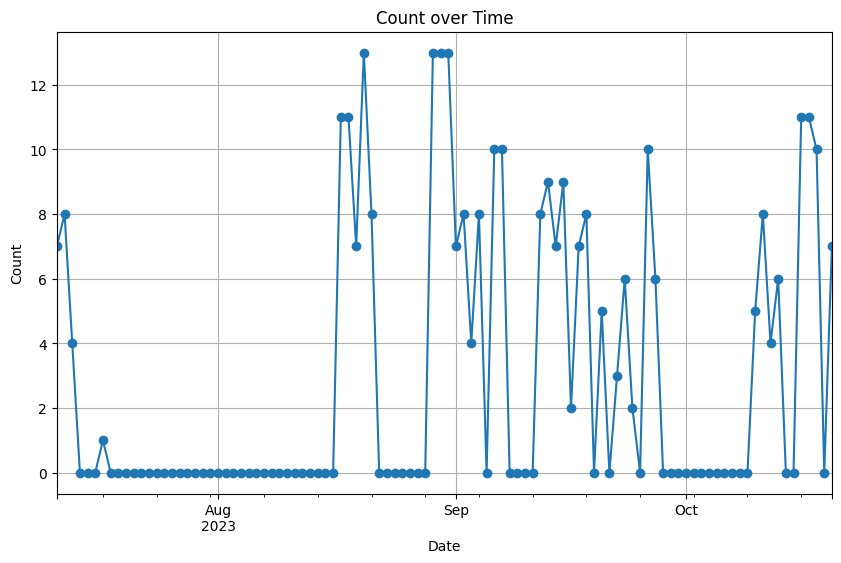

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Convert the index to datetime objects
day_games_count.index = pd.to_datetime(day_games_count.index)

# Sort the DataFrame by date
date_counts = day_games_count.sort_index()

# Resample to create a regular time series with a consistent time step
resampled_counts = date_counts.resample('D').sum()

# Plot the line graph
plt.figure(figsize=(10, 6))
resampled_counts.plot(marker='o', linestyle='-')
plt.title('Count over Time')
plt.xlabel('Date')
plt.ylabel('Count')
plt.grid(True)
plt.show()


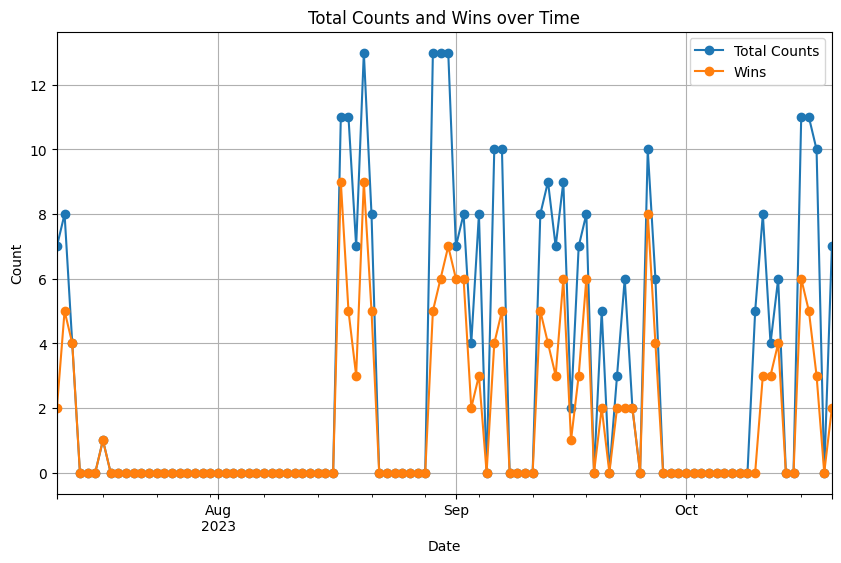

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Count total occurrences per day
total_counts = df_noway_kr.groupby(df_noway_kr['gameCreation'].dt.date).size()

# Count wins per day
win_counts = df_noway_kr[df_noway_kr['win']].groupby(df_noway_kr['gameCreation'].dt.date).size()

# Convert the index to datetime objects
total_counts.index = pd.to_datetime(total_counts.index)
win_counts.index = pd.to_datetime(win_counts.index)

# Sort the DataFrames by date
total_counts = total_counts.sort_index()
win_counts = win_counts.sort_index()

# Resample to create a regular time series with a consistent time step
resampled_total_counts = total_counts.resample('D').sum()
resampled_win_counts = win_counts.resample('D').sum()

# Plot the line graph for total counts
plt.figure(figsize=(10, 6))
resampled_total_counts.plot(marker='o', linestyle='-', label='Total Counts')

# Plot the line graph for win counts
resampled_win_counts.plot(marker='o', linestyle='-', label='Wins')

plt.title('Total Counts and Wins over Time')
plt.xlabel('Date')
plt.ylabel('Count')
plt.grid(True)
plt.legend()
plt.show()


In [ ]:
df_noway_kr['kda'] = (df_noway_kr['kills'] + df_noway_kr['assists']) / df_noway_kr['deaths'].replace(0, 1)  # Avoid division by zero
average_kda_per_champion = df_noway_kr.groupby('championName')['kda'].mean()
average_kda_per_champion.sort_values(ascending=False)

championName
Ezreal          7.015873
Zed             4.507576
Ahri            4.229574
Xerath          3.635245
Anivia          3.525000
Lissandra       3.431190
Rumble          3.262257
Orianna         2.968943
Ziggs           2.859933
Malphite        2.733333
Gragas          2.696833
Heimerdinger    2.568182
Viktor          2.533730
Veigar          2.333333
Gangplank       2.274316
Azir            2.181153
Corki           1.983550
Alistar         1.979545
Akshan          1.772006
Nautilus        1.746032
Tristana        1.675492
Galio           1.666667
Jayce           1.642727
Cassiopeia      1.387566
Ornn            1.233333
Leblanc         1.233333
LeeSin          1.184524
Jhin            1.000000
Syndra          0.934343
Lux             0.700000
Name: kda, dtype: float64

In [ ]:
(df_noway_kr.groupby("championName")["gameDuration"].mean() // 60).sort_values(ascending=False)

championName
Alistar         30.0
Veigar          30.0
Jhin            29.0
Nautilus        28.0
Jayce           28.0
Zed             28.0
Corki           28.0
Malphite        28.0
Gangplank       28.0
Heimerdinger    28.0
Akshan          27.0
Leblanc         27.0
Ahri            27.0
Azir            27.0
Syndra          27.0
Orianna         26.0
Xerath          26.0
Ziggs           26.0
Gragas          26.0
Rumble          25.0
Viktor          25.0
Anivia          25.0
LeeSin          25.0
Lissandra       24.0
Tristana        24.0
Ezreal          24.0
Galio           23.0
Ornn            22.0
Cassiopeia      22.0
Lux             13.0
Name: gameDuration, dtype: float64

In [ ]:
# Calculate the KDA for each row
df_noway_kr['kda'] = (df_noway_kr['kills'] + df_noway_kr['assists']) / df_noway_kr['deaths'].replace(0, 1)  # Avoid division by zero

# Group by 'championName' and calculate aggregated values
agg_df = df_noway_kr.groupby('championName').agg(
    GamesPlayed=('championName', 'count'),
    Wins=('win', 'sum'),
    AverageGameTime=('gameDuration', 'mean')
)

# Calculate WinRate
agg_df['WinRate'] = agg_df['Wins'] / agg_df['GamesPlayed']

# Reset the index to make 'championName' a regular column
agg_df.reset_index(inplace=True)

agg_df["AverageGameTime"] = agg_df["AverageGameTime"] // 60

agg_df.sort_values(by="GamesPlayed", ascending=False)


,championName,GamesPlayed,Wins,AverageGameTime,WinRate
9,Gangplank,41,20,28.0,0.487805
10,Gragas,39,21,26.0,0.538462
20,Orianna,28,17,26.0,0.607143
26,Viktor,27,17,25.0,0.629630
27,Xerath,21,10,26.0,0.476190
29,Ziggs,18,9,26.0,0.500000
22,Rumble,18,12,25.0,0.666667
0,Ahri,15,9,27.0,0.600000
4,Azir,14,8,27.0,0.571429
24,Tristana,11,3,24.0,0.272727


In [ ]:
amount_of_games_ended_in_surrender = df_noway_kr["gameEndedInSurrender"].value_counts()[True]
amount_of_games = df_noway_kr.shape[0]
percentage_surrendered_games = amount_of_games_ended_in_surrender / float(amount_of_games)

f"Percentage of Games ended in Surrender: {round(percentage_surrendered_games, 2) * 100} %."

'Percentage of Games ended in Surrender: 32.0 %.'